
READ DATA SET

In [ ]:
import pandas as pd
data = pd.read_csv('../data/WineQT.csv')

DATA HEAD

In [16]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


DATA INFO

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


DESKRIPSI SINGKAT

In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


SPLIT DATA

In [19]:
x = data.iloc[:, 0:11].values
y = data.iloc[:, 11].values.ravel()



FEATURE SCALLING

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)


SPLIT TRAIN TEST

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

KLASIFIKASI KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

TRAINING FIT/ MODEL

In [23]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(x_train, y_train)


PREDIKSI/TEST

In [24]:
y_predict = knn.predict(x_test)

CEK AKURASI & EVALUASI

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sb

Nilai akurasi 0.5982532751091703
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.29      0.31         7
           5       0.67      0.71      0.69       100
           6       0.56      0.57      0.56        92
           7       0.50      0.44      0.47        27
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.34      0.33      0.34       229
weighted avg       0.59      0.60      0.59       229



<Axes: >

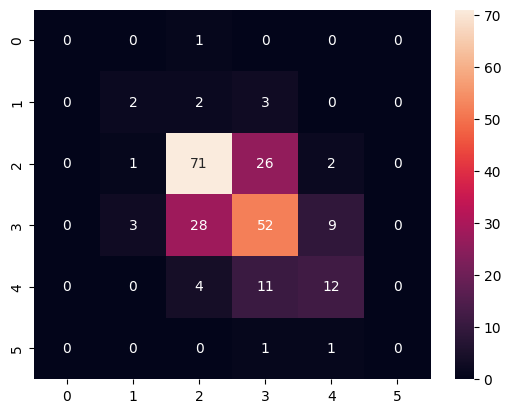

In [26]:
print("Nilai akurasi", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict, zero_division=0))
sb.heatmap(confusion_matrix(y_test, y_predict),annot=True)

MNECARI NILAI K YANG TERBAIK

In [27]:
import numpy as np
n_akurasi = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    akurasi = accuracy_score(y_test, y_predict) * 100
    n_akurasi.append(akurasi)
n_akurasi_array = np.array(n_akurasi)
n_akurasi_bulat = n_akurasi_array.round(3)
print(n_akurasi_bulat)

[60.262 57.205 59.825 61.135 57.642 55.459 58.515 60.699 64.192 62.009
 63.319 62.882 64.192 63.319 61.572 63.755 63.319 63.755 62.009 64.629
 63.755 64.192 61.572 63.319 63.755 64.629 65.502 62.882 62.445]


GRAFIK/CHART

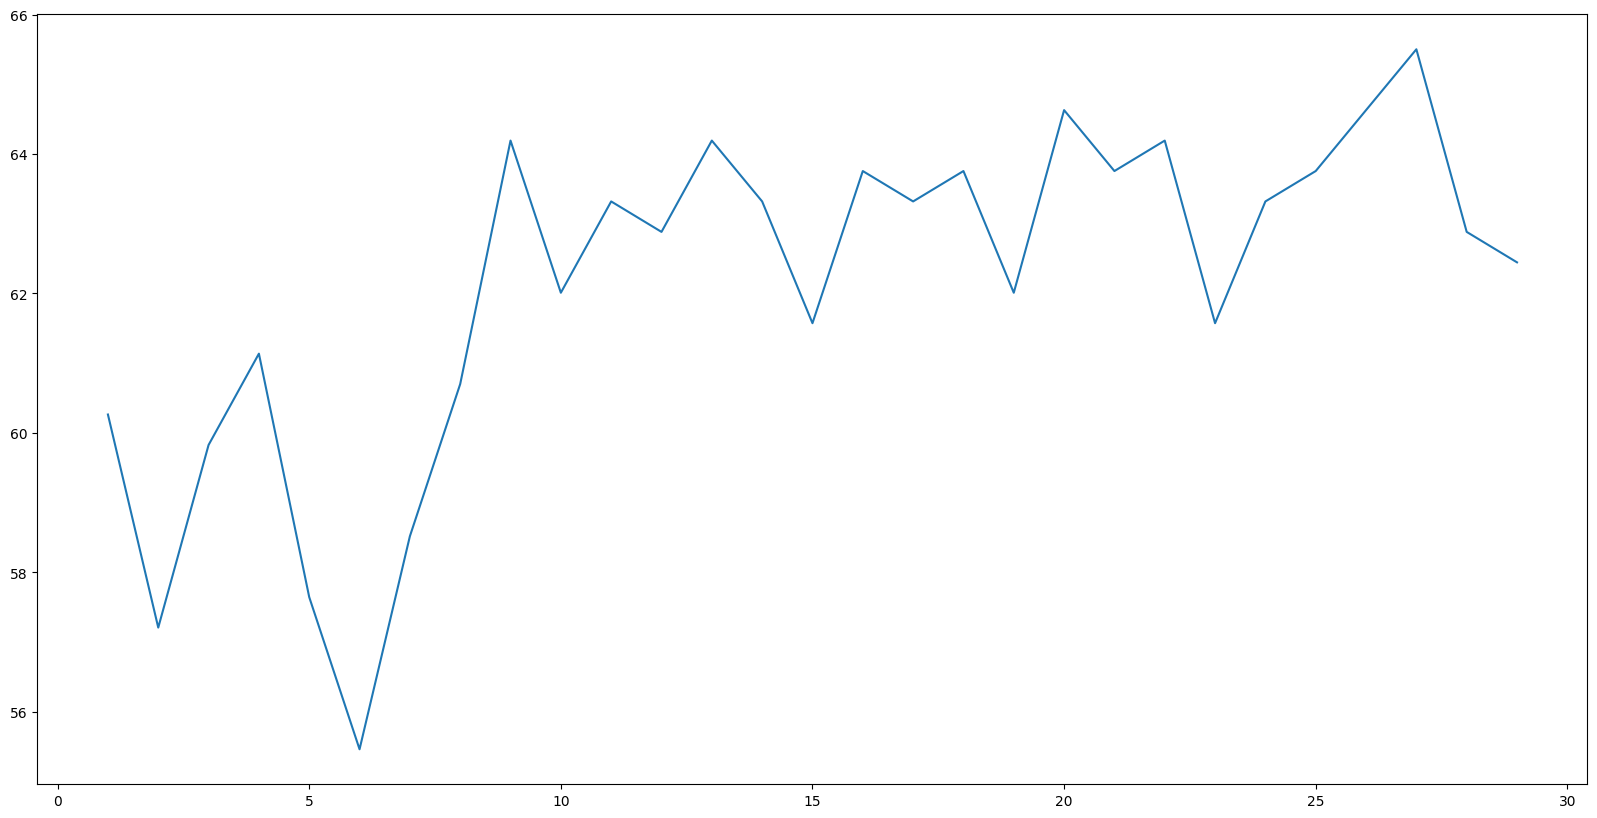

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(range(1, 30), n_akurasi_bulat)
plt.show()

JADI NILAI K YANG TERBAIK K 27 DENGAN AKURASI 65,